<a href="https://colab.research.google.com/github/yoonputer/test_deeplearning/blob/master/reuter_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.reuters.load_data(num_words=10000)
x_train.shape, y_train.shape,x_test.shape,y_test.shape 

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((8982,), (8982,), (2246,), (2246,))

In [3]:
print(y_train[50], x_train[50])

4 [1, 1479, 1197, 71, 8, 25, 1479, 1197, 640, 71, 304, 471, 80, 9, 1379, 1901, 4530, 6797, 79, 5, 8144, 71, 175, 80, 58, 4, 1279, 5, 63, 32, 20, 5, 4, 326, 175, 80, 335, 7, 10, 845, 31, 4, 221, 9, 108, 259, 1479, 1197, 640, 8, 16, 600, 69, 68, 11, 15, 6, 8144, 21, 397, 321, 6, 438, 1761, 3072, 79, 5, 8144, 1040, 894, 1051, 617, 80, 4, 617, 80, 23, 1051, 172, 3814, 3206, 8144, 175, 79, 9, 1379, 6, 264, 395, 3814, 3206, 79, 1479, 1197, 9, 25, 323, 8, 4, 8144, 80, 23, 381, 43, 42, 205, 50, 77, 33, 909, 9, 3509, 22, 216, 6, 216, 17, 12]


In [4]:
len(x_train[50]), len(x_train[400]), len(x_train[200])

(118, 90, 212)

In [5]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
len(pad_x_train[50])

500

In [6]:
import numpy as np

In [7]:
np.unique(y_train).shape, np.unique(y_train)

((46,),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]))

# make model

In [8]:
model = tf.keras.models.Sequential()

In [9]:
model.add(tf.keras.layers.Embedding(input_length=500, input_dim=10000, output_dim=24)) # input layer
model.add(tf.keras.layers.LSTM(24, return_sequences=True, activation='tanh')) # hidden layer
model.add(tf.keras.layers.LSTM(12, activation='tanh')) # hidden layer
# model.add(tf.keras.layers.Flatten()) # hidden layer
model.add(tf.keras.layers.Dense(46, activation='softmax')) # output layer

model. compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) # gadget
# sparse는 y까지 데이터를 카테고리화

In [10]:
#hist = model.fit(pad_x_train, y_train, epochs=5, validation_split=0.3, batch_size=128)
hist = model.fit(pad_x_train, y_train, epochs=100, validation_split=0.3, batch_size=256)

Epoch 1/100
25/25 [==============================] - 23s 774ms/step - loss: 3.7366 - acc: 0.3250 - val_loss: 3.4795 - val_acc: 0.3532
Epoch 2/100
25/25 [==============================] - 19s 744ms/step - loss: 3.1803 - acc: 0.3510 - val_loss: 2.8684 - val_acc: 0.3532
Epoch 3/100
25/25 [==============================] - 18s 737ms/step - loss: 2.7208 - acc: 0.3510 - val_loss: 2.5480 - val_acc: 0.3532
Epoch 4/100
25/25 [==============================] - 18s 741ms/step - loss: 2.5203 - acc: 0.3510 - val_loss: 2.4429 - val_acc: 0.3532
Epoch 5/100
25/25 [==============================] - 18s 742ms/step - loss: 2.4571 - acc: 0.3510 - val_loss: 2.4109 - val_acc: 0.3532
Epoch 6/100
25/25 [==============================] - 19s 747ms/step - loss: 2.4352 - acc: 0.3510 - val_loss: 2.3984 - val_acc: 0.3532
Epoch 7/100
25/25 [==============================] - 19s 751ms/step - loss: 2.4257 - acc: 0.3510 - val_loss: 2.3920 - val_acc: 0.3532
Epoch 8/100
25/25 [==============================] - 19s 752ms

# Evaluation

In [11]:
# 학습 시켰던 데이터
model.evaluate(pad_x_train, y_train) # loss: 2.4030 - acc: 0.3517

281/281 [==============================] - 20s 69ms/step - loss: 1.3546 - acc: 0.6044


[1.3546289205551147, 0.6044310927391052]

In [12]:
# x_test 전처리
pad_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

In [13]:
# pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
# pad_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)
# 이러한 전처리를 function 화 시키기
def pad_make(x_data):
  pad_x = tf.keras.preprocessing.sequence.pad_sequences(x_data, maxlen=500)
  return pad_x

In [14]:
 pad_make_x = pad_make(x_test)

In [15]:
# 학습 시키지 않은 데이터 ( 함수 사용한 변수이용 )
model.evaluate(pad_make_x, y_test)

71/71 [==============================] - 5s 70ms/step - loss: 2.7516 - acc: 0.4172


[2.7516114711761475, 0.41718611121177673]

In [16]:
# 학습 시키지 않은 데이터
model.evaluate(pad_x_test, y_test) # loss: 2.4158 - acc: 0.3620

71/71 [==============================] - 5s 67ms/step - loss: 2.7516 - acc: 0.4172


[2.7516114711761475, 0.41718611121177673]

In [17]:
# 과적합인가? 확실하게 판단 --> plot 그리기
import matplotlib.pyplot as plt

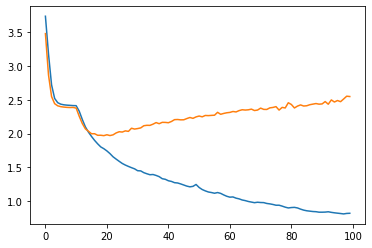

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'r-')
plt.show()

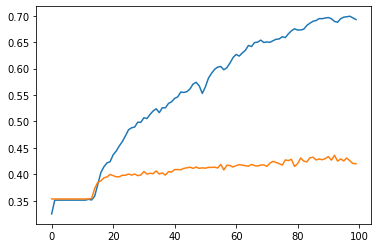

In [19]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'r-')
plt.show()
# 'r-' 넣기 전 --> acc가 정상작동하지 않아서 이상한 결과값이 나옴

In [30]:
from sklearn.metrics import classification_report

In [20]:
y_train_pred = model.predict(pad_x_train)
y_train_pred[0]

array([6.2281615e-04, 2.8919082e-03, 1.4765442e-05, 6.0348094e-01,
       3.7369439e-01, 5.3882930e-05, 2.1079519e-05, 7.0590066e-04,
       8.5960189e-04, 9.0425412e-05, 5.2833534e-04, 4.2639077e-03,
       1.7929076e-04, 2.7482022e-04, 3.9007844e-04, 3.6070199e-04,
       3.3690534e-03, 2.9881763e-05, 1.3126008e-05, 2.5160019e-03,
       1.9656068e-03, 6.3311483e-05, 9.6672527e-05, 1.3965655e-04,
       2.0959364e-05, 1.1155249e-05, 1.0710847e-05, 8.2663598e-04,
       1.4204386e-04, 1.9583973e-05, 5.9398770e-04, 2.8294348e-04,
       2.4756591e-04, 9.6408286e-05, 8.4826470e-06, 1.4266060e-04,
       2.1548024e-04, 2.9650157e-05, 9.1236543e-05, 3.8436442e-04,
       5.8918486e-05, 2.6634798e-06, 5.1742951e-05, 3.1500633e-05,
       6.6918539e-05, 3.8332371e-05], dtype=float32)

In [21]:
import numpy as np

In [23]:
y_pred = np.argmax(y_train_pred,axis=1)
y_pred.shape

(8982,)

In [24]:
len(y_train)

8982

In [ ]:
print(classification_report(y_train, y_pred))

In [26]:
y_test_pred =  model.predict(pad_x_test)

In [27]:
y_pred = np.argmax(y_test_pred, axis=1)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.09      0.17      0.12        12
           1       0.38      0.19      0.25       105
           2       0.03      0.05      0.04        20
           3       0.63      0.92      0.75       813
           4       0.11      0.00      0.01       474
           5       0.00      0.00      0.00         5
           6       0.08      0.07      0.08        14
           7       1.00      0.33      0.50         3
           8       0.37      0.18      0.25        38
           9       0.16      0.20      0.18        25
          10       0.00      0.00      0.00        30
          11       0.18      0.35      0.23        83
          12       0.25      0.08      0.12        13
          13       0.03      0.05      0.04        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.21      0.26      0.24        99
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Service

In [ ]:
# 문장 입력
# --> 문장을 숫자로( 사전을 기준으로 ) --> [, , , , ...] (스칼라(딕셔너리)) --> pad_sequence
model.predict()